# Creating Charlottesville street maps using Plotly (and saving them to a PDF using fpdf2)

By Kenneth Burchfiel

Released under the MIT License


In [1]:
# Specifying default height, width, and scale settings that should improve
# the display of these maps when printed on letter-size paper (assuming
# half-inch margins):
chart_height = 1000 # Making the height longer than the width
# will help accommodate portrait-style prints
aspect_ratio = 7.5/10 # With half-inch margins, 
# an 8.5x11 print will actually become a 7.5*10 print. Therefore,
# we'll use 7.5/10 as our aspect ratio variable.
chart_width = chart_height * aspect_ratio 
chart_scale = 1 # Higher scale settings improve the appearance of 
# added-in text, but not the tiles themselves--so I think it's best
# to keep them at 1 to reduce file sizes.
# If you want the printed charts to have a higher resolution, consider
# zooming in *and* increasing the chart height.
print(chart_width * chart_scale, chart_height * chart_scale)
# For much more detailed charts, try setting chart_height to 3840
# and chart_scale to 1. These maps will show up great on screen;
# however, their details might get lost when printing unless you have
# an *extremely* good printer.
from IPython.display import Image
from fpdf import FPDF
import os
tiled_map_path = 'maps/tiled/'

750.0 1000


In [2]:
import plotly.express as px

In [3]:
def gen_and_save_map(save_path, lat, lon, zoom, 
                    chart_width = chart_width, chart_height = chart_height,
                    chart_scale = chart_scale, caption = ''):
    '''This function calls choropleth_map() to create a map;
    saves it to a PNG file at the path specified by save_path; 
    and then returns a view of that file.'''
    
    px_map = px.choropleth_map(
    center = {'lat':lat,'lon':lon}, 
    zoom = zoom, map_style = 'open-street-map').update_layout(
    margin={"r":0,"t":0,"l":0,"b":0}).add_annotation(
        x = 0.02, y = 0.02, showarrow=False, text = caption,
    opacity = 0.5)
    # The above code was based on
    # https://plotly.com/python/tile-county-choropleth/
    # Note that we don't actually need to specify data for a choropleth
    # map in order to create a map using choropleth_map()!
    # For map style options, see
    # https://plotly.com/python-api-reference/generated/
    # plotly.express.choropleth_map.html
    px_map.write_image(save_path, 
                         width = chart_width, height = chart_height, 
                                scale = chart_scale)
    return Image(save_path, height = 720)
# cville_area_map

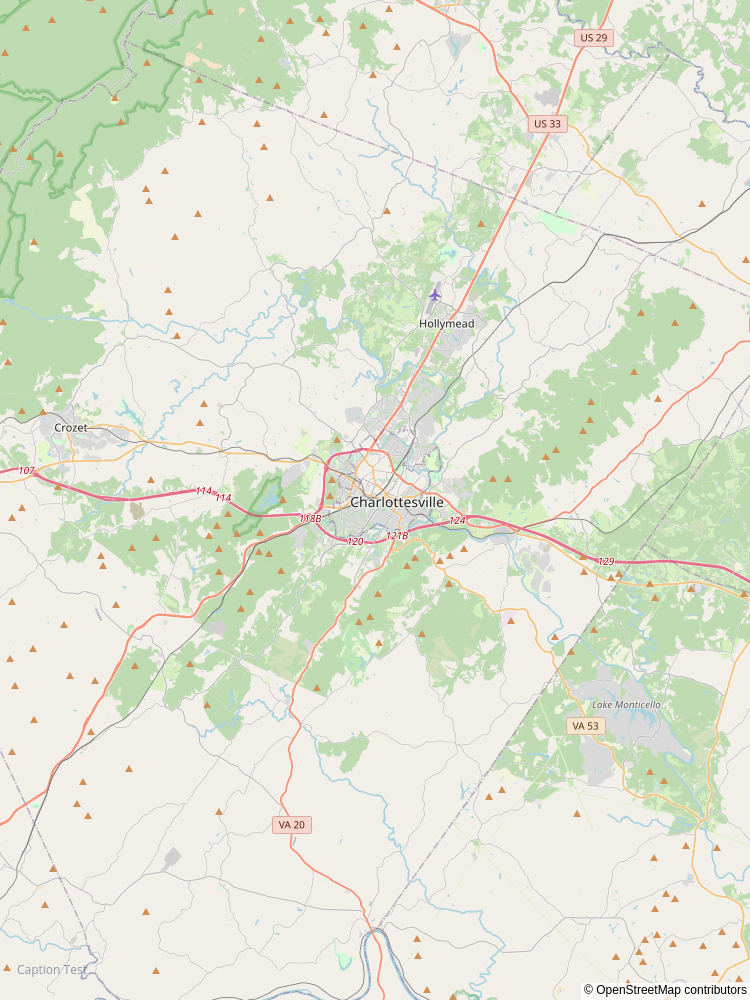

In [4]:
gen_and_save_map(save_path = 'maps/cville_area_map.png',
                 lat = 38.03, lon = -78.4918, zoom = 10,
                caption = 'Caption Test')

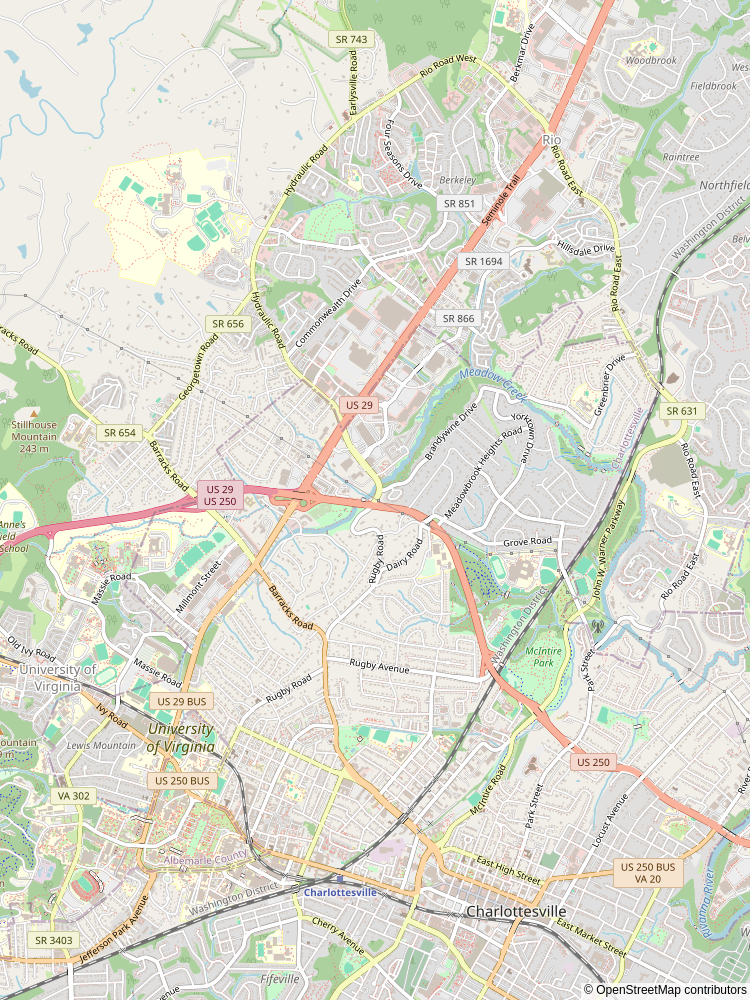

In [5]:
gen_and_save_map(save_path = 'maps/cville_overview_map.png',
                  lat = 38.0571, lon = -78.4888, zoom = 13)

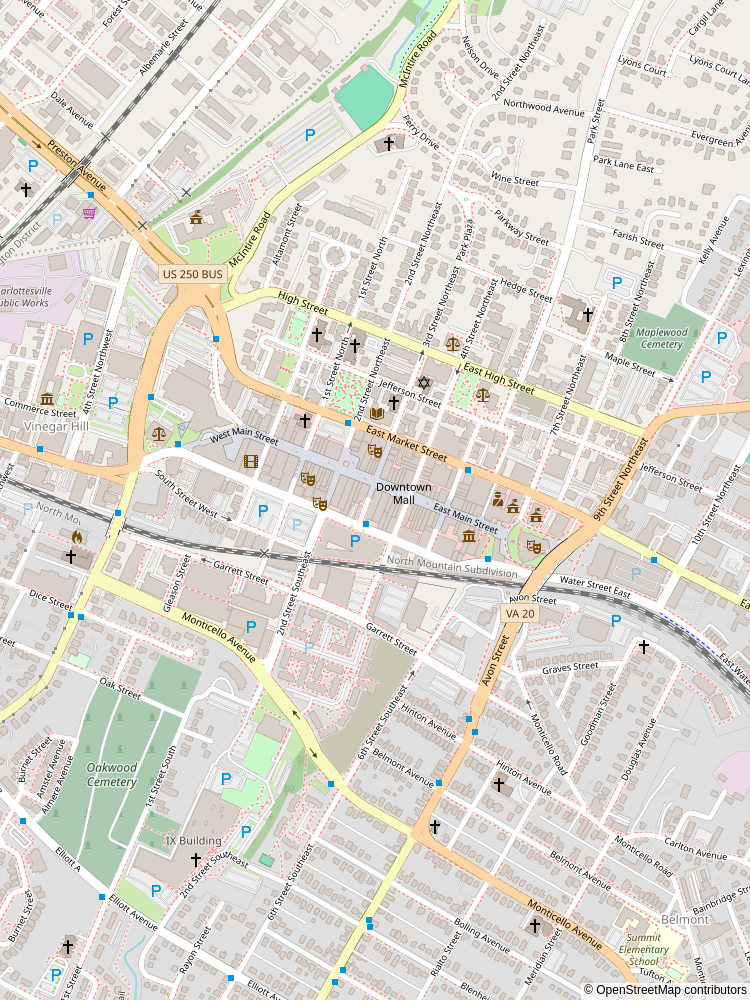

In [6]:
gen_and_save_map(save_path = 'maps/cville_downtown_map.png',
                 lat = 38.03, lon = -78.48, zoom = 15)

## Revised lat/lon calculations:

In [7]:
top_left_lat = 38.038537 # Found these coordinates by navigating to the top-left
# point on openstreetmap.org, selecting 'Center Map Here',
# and then referencing the updated URL
top_left_lon = -78.487723
bottom_right_lat = 38.02133
bottom_right_lon = -78.47202

lat_change = (bottom_right_lat - top_left_lat)*0.95
lon_change = (bottom_right_lon - top_left_lon)*0.95

(lat_change, lon_change)

(-0.01634664999999913, 0.014917850000001918)

In [8]:
# Creating a series of detailed maps that will cover 
# a larger specified range:

Latitude/longitude calculations:

(Determining the width, in longitude, and height, in latitude, spanned by a map of the Charlottesville area at 15x zoom:

```
Location	Lat	Lon
Top left	38.045134	-78.496467
Bottom right	38.013502	-78.465568
Change	-0.0316319999999948	0.0308989999999909
```

The 'change' values indicate how far we should adjust our latitude and longitude coordinates in order to create a set of maps that efficiently encompass Charlottesville. (I'll reduce these values a bit to allow for some overlap between maps, which should improve readability.)

In [9]:
top_left_coords = [38.1176, -78.54891] # Originally used -78.53491
# as the longitude value; however, I decided to shift this map west
# by lon_change/2 so that the downtown area wouldn't be split across maps.
bottom_right_coords = [38.03145, -78.491803]

Determining how many times we'll need to iterate to the east and to the south to encompass our region:

In [10]:
print(abs((top_left_coords[0] - bottom_right_coords[0])/lat_change))
print(abs((top_left_coords[1] - bottom_right_coords[1])/lon_change))

# It looks like iterating 3 times from north to south and 2 times from 
# west to east should cover the city quite well.
# (I ended up iterating 4 times in each direction in order to cover a wider
# area.)

5.270192975319596
3.828098553075321


Determining the starting point of our top-left map: 

(We can calculate this point by adding half of lat_change to the latitude stored within top_left_coords and half of lon_change to the longitude stored within that list.)

In [11]:
starting_map_coords = [top_left_coords[0] + lat_change/2, top_left_coords[1] + lon_change/2]
starting_map_coords

[38.109426675, -78.54145107500001]

## Creating tiled maps:

In [12]:
map_num = 1
for lat_change_value in range(8):
    for lon_change_value in range(8):
        current_map_coords = [
            starting_map_coords[0] + lat_change * lat_change_value,
            starting_map_coords[1] + lon_change * lon_change_value]
        # print(current_map_coords)
        # Creating a map code that can be used to differentiate saved
        # images:
        map_code = f"{lat_change_value}_{lon_change_value}"
        # print(map_code)
        gen_and_save_map(
            save_path = f'{tiled_map_path}cville_tiled_map_{map_code}.png',
            lat = current_map_coords[0], lon = current_map_coords[1], 
            zoom = 15, caption = str(map_num) + ' (' + map_code + ')')
        map_num += 1
        

## Adding these tiled maps to a PDF:

(These maps can also get viewed directly as PNG images, but placing them all within a PDF document will make it easier to print and share them.)

In [18]:
tiled_map_images = os.listdir(tiled_map_path)
tiled_map_images.sort()
# Displaying the first three and last three images within our list:
tiled_map_images[0:3] + tiled_map_images[-3:]

['cville_tiled_map_0_0.png',
 'cville_tiled_map_0_1.png',
 'cville_tiled_map_0_2.png',
 'cville_tiled_map_7_5.png',
 'cville_tiled_map_7_6.png',
 'cville_tiled_map_7_7.png']

## Generating a PDF-based map book using the FPDF library:

In [23]:
pdf = FPDF(format='letter')
# Based in part on 
# https://py-pdf.github.io/fpdf2/notebook.html
# and https://py-pdf.github.io/fpdf2/PageFormatAndOrientation.html

pdf.add_page() # It appears that this only needs to be called once,
# at the beginning of the PDF; each image will get added to its own 
# page automatically.
pdf.set_font("helvetica", size = 20) # See
# https://py-pdf.github.io/fpdf2/Tutorial.html#tuto-2
# -header-footer-page-break-and-image
# and https://py-pdf.github.io/fpdf2/Unicode.html
# (for a list of built-in fonts)
pdf.multi_cell(text = '''
**A Simple Charlottesville Map Book**

by Kenneth Burchfiel

Created in Python using the Plotly and FPDF libraries. The Python code \
is available under the MIT license.

Map content comes from OpenStreetMap and is available under the \
Open Database License. See openstreetmap.org/copyright for more details.

Note: this document contains 64 maps within an 8x8 grid. Gray '#_#' \
codes at the bottom left of each page help illustrate how each of \
these maps relates to the others. 

The first number within these codes refers to the latitude of the map; \
higher numbers indicate a lower (more southern) latitude. The second \
number refers to its longitude; higher numbers indicate a higher \
(more eastern) longitude. 

For example, the map farthest to the northwest will have a code of 0_0; \
the map farthest to the southeast will have a code of 7_7; \
and the map with a code of 1_2 will be one map east of the easternmost \
maps and two maps south of the northernmost maps.

The maps directly to the north, south, east, and west of map 1_2 will be \
maps 0_2, 2_2, 1_3, and 1_1, respectively.
''', w = pdf.epw, markdown = True, align = 'L')
# The multi_cell() call was based in part on:
# https://py-pdf.github.io/fpdf2/fpdf/fpdf.html#fpdf.fpdf.FPDF.multi_cell

# Adding each tiled image file to the PDF: (each image will get added
# to its own page.)
for i in range(len(tiled_map_images)):
    # Adding a relatively full-page image:
    # (width is set as a function of eph and aspect_ratio, rather than
    # pdf.epw, in order to avoid stretching the image horizontally.)
    image_pdf_height = pdf.eph * 1.03
    image_pdf_width = image_pdf_height * aspect_ratio
    pdf.image(tiled_map_path+tiled_map_images[i], h = image_pdf_height,
             w = image_pdf_width)
# Based on the code found at 
# https://py-pdf.github.io/fpdf2/Images.html#side-by-side-images-full-
# height-landscape-page
pdf.output("cville_map_book.pdf")